In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

### Load the the Magic Gamma Hadron dataset

In [ ]:
df=pd.read_csv('data\\magic04.data',header=None)
cols=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
df.columns=cols
df['class']=df['class'].map({'g':0,'h':1})

### Create histogram of feature Relations to get insights

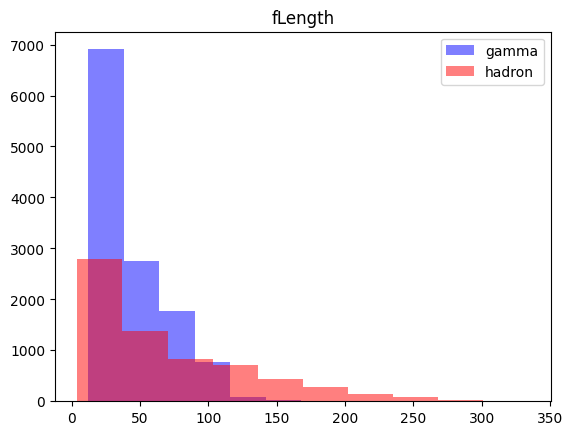

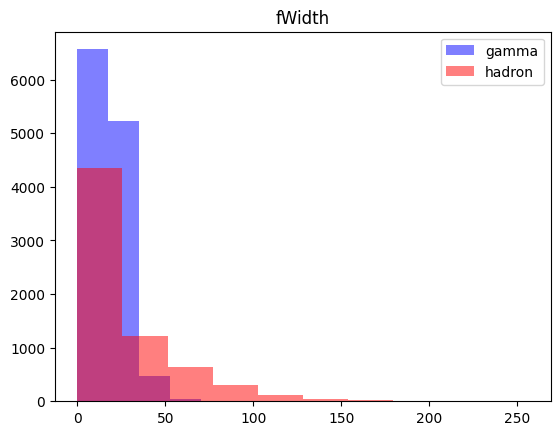

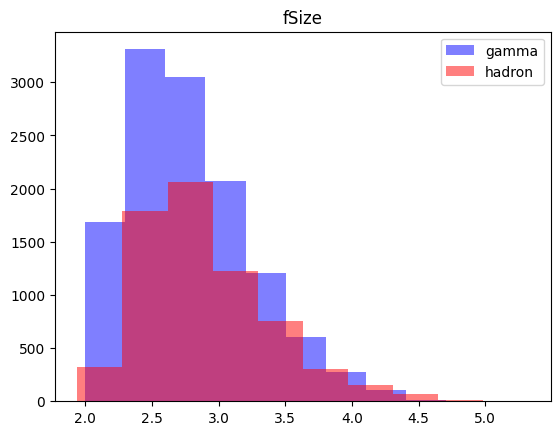

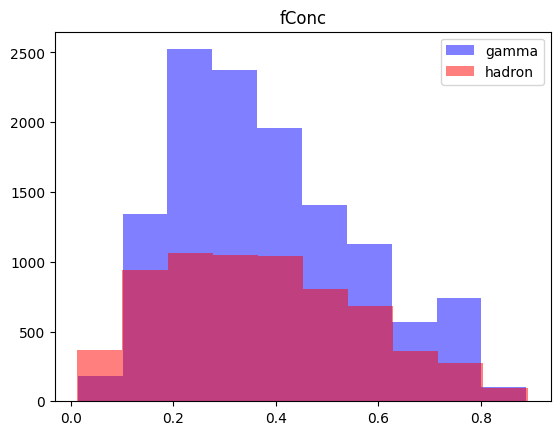

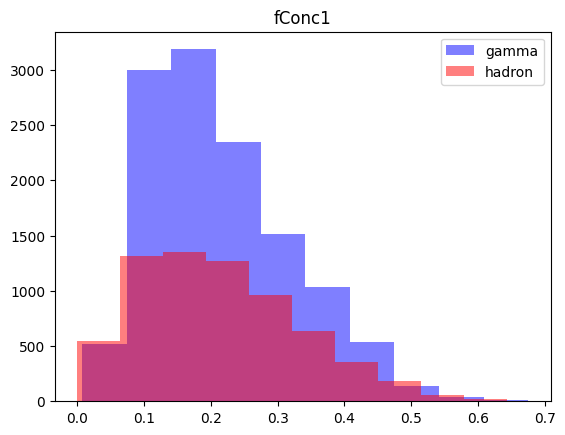

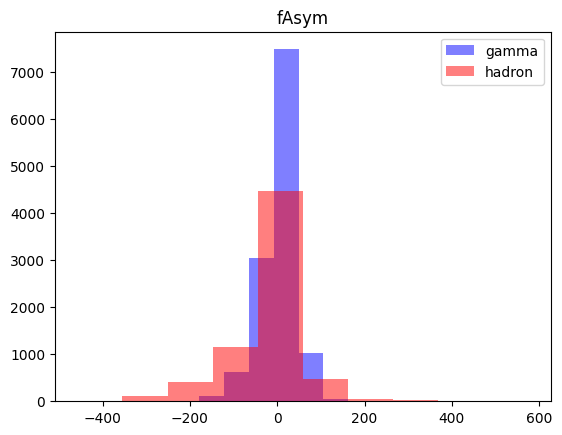

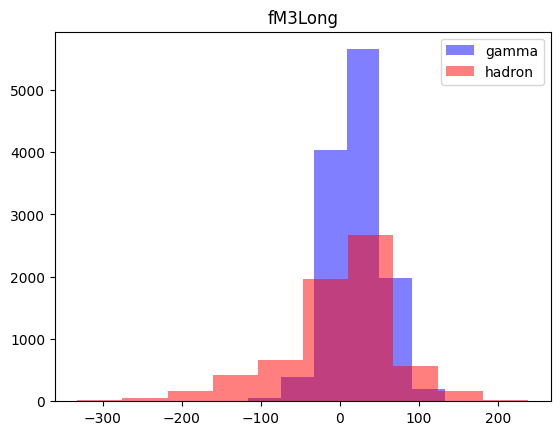

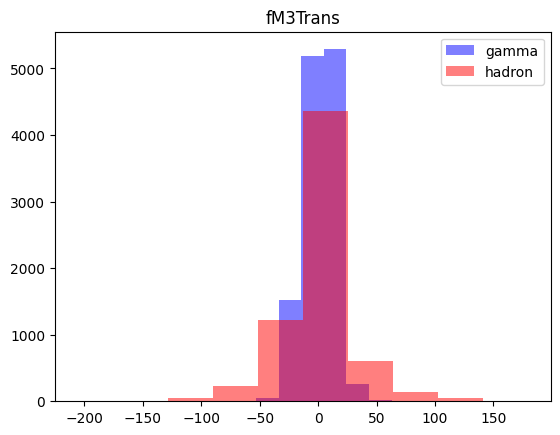

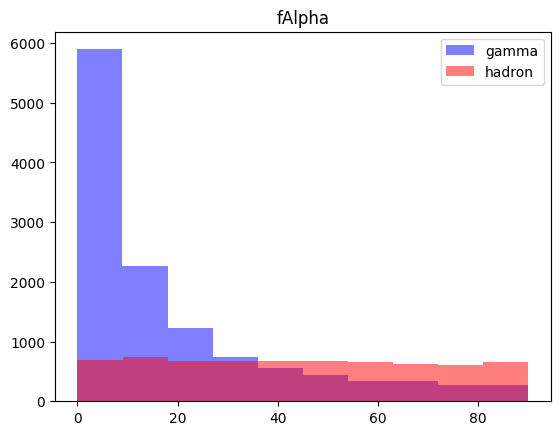

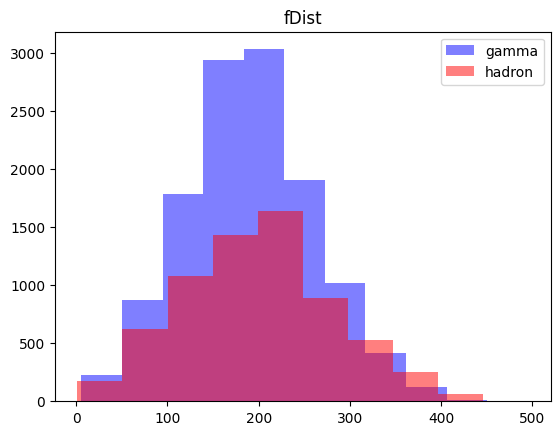

In [ ]:
cols_features=cols[:-1]

for col in cols_features:
    plt.figure()
    plt.hist(df[df['class']==0][col],color='blue',alpha=0.5,label='gamma')
    plt.hist(df[df['class']==1][col],color='red',alpha=0.5,label='hadron')
    plt.legend()
    plt.title(col)
    plt.show()

### Train, Valid, test datasets

In [44]:
train,valid,test=np.split(df.sample(frac=1,random_state=42),[int(.6*len(df)),int(.8*len(df))])



c:\Users\AB6123707\OneDrive - Bell Canada\Documents\Github\ml_studying\.ml_libs\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
df['class'].value_counts()

class
0    12332
1     6688
Name: count, dtype: int64

### Data Preprocessing (Scaling and OverSampling)

In [45]:
def scale_data(df,oversample=True):
    X=df[cols_features].values
    y=df['class'].values



    scaler=StandardScaler()
    if oversample:
        smote=SMOTE(random_state=42)
        X,y=smote.fit_resample(X,y)


    X_scaled=scaler.fit_transform(X)

    
    data=np.hstack((X_scaled,y.reshape(-1,1)))
    return data,X_scaled,y


train,X_train,y_train=scale_data(train,True)
valid,X_valid,y_valid=scale_data(valid,False)
test,X_test,y_test=scale_data(test,False)
    

### K-Nearest Neighbours
- Find the k nearest neighbours to your point. Get the value of the majority of those neighbours (usually 3-5)
- Distance is euclidean

In [57]:
#implement k nearest neighbours
def knnFunc(X_train,y_train,X_test,k=5):

    y_pred=[]

    for test_point in X_test:
        distance=np.linalg.norm(X_train - test_point,axis=1)
        knn_indices=np.argsort(distance)[:k]
        knn_labels=y_train[knn_indices]
        unique,count=np.unique(knn_labels,return_counts=True)
        majority_lables=unique[np.argmax(count)]

        y_pred.append(majority_lables)

    return np.array(y_pred)

y_pred=knnFunc(X_train,y_train,X_test,k=5)

accuracy=np.sum(y_pred==y_test)/len(y_test)
print(f'My Func: {accuracy*100:.2f}%')

#Option 2: Sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

knn=KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
labels=knn.predict(X_test)

print("SkLearn Func:",accuracy_score(y_test,labels))

print(classification_report(y_test,labels))

My Func: 79.97%
SkLearn Func: 0.7996845425867508
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      2473
           1       0.69      0.78      0.73      1331

    accuracy                           0.80      3804
   macro avg       0.78      0.80      0.79      3804
weighted avg       0.81      0.80      0.80      3804



### Niave Bayes
                Covide Test
                    1           0
-  Has      1       531         6      537      
-  Covid    0       20       9443      9466      
-                   551      
                   

What is the prob of having covid given a positive test?
- p(covid| +ve test)= 531/551=96.4%

Bayes Rule: P(A|B)=(P(B|A)P(A))/P(B)

EX:
- P(fp)=0.05, p(fn)=0.01 => P(+ve|~d)=0.05, p(-ve| d)=0.01
- p(d)=0.1

-P(d|+ve test)= (p(+ve|d)p(d))/p(+ve)
              = (1-p(-ve|d))*0.1/(p(+ve|d))+p(+ve|~d)
              =(1-0.01)*0.1/((1-0.01)+0.05)
              =0.099/(0.099+0.05*.9)
              = 0.6875


In [59]:
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()

nb_model.fit(X_train,y_train)
y_pred-nb_model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7996845425867508
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      2473
           1       0.69      0.78      0.73      1331

    accuracy                           0.80      3804
   macro avg       0.78      0.80      0.79      3804
weighted avg       0.81      0.80      0.80      3804



## Logistic Regression